# Related to figure 3j

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_final = pd.read_csv('/data/yuchen_data/Stereo_seq/All_Figures/Figure3/1.data/tangram.rst.txt', index_col=0, sep='\t')
df_final

,Cluster_0,Cluster_1,ct,diff,TLS_maturity,sample,TLS_final
ST2772B_BIN.18239,0.000199,0.000429,Cluster_1,0.000230,Conforming,ST2772B,ST2772B_1
ST2772B_BIN.18769,0.000441,0.000542,Cluster_1,0.000101,Conforming,ST2772B,ST2772B_1
ST2772B_BIN.20888,0.000035,0.000879,Cluster_1,0.000845,Conforming,ST2772B,ST2772B_1
ST2772B_BIN.20889,0.000384,0.000188,Cluster_0,0.000196,Conforming,ST2772B,ST2772B_1
ST2772B_BIN.22481,0.000798,0.000256,Cluster_0,0.000542,Conforming,ST2772B,ST2772B_1
...,...,...,...,...,...,...,...
ST2976T_BIN.243513,0.000341,0.000176,Cluster_0,0.000166,Mature,ST2976T,ST2976T_31
ST2976T_BIN.245108,0.000109,0.000370,Cluster_1,0.000262,Mature,ST2976T,ST2976T_31
ST2976T_BIN.245634,0.000147,0.000161,Cluster_1,0.000013,Mature,ST2976T,ST2976T_31
ST2976T_BIN.245636,0.000114,0.000292,Cluster_1,0.000178,Mature,ST2976T,ST2976T_31


In [16]:
df_rst = pd.crosstab(df_final.TLS_maturity, df_final.ct)
df_rst = df_rst.reindex(['Mature', 'Deviating'])
df_rst

ct,Cluster_0,Cluster_1
TLS_maturity,,
Mature,538,301
Deviating,167,308


In [19]:
from  scipy.stats import chi2_contingency

kt = chi2_contingency(df_rst)
print(kt)

Chi2ContingencyResult(statistic=101.17327908690336, pvalue=8.427861489942538e-24, dof=1, expected_freq=array([[450.14840183, 388.85159817],
       [254.85159817, 220.14840183]]))


In [20]:
df_rst = df_rst.T
df_rst = df_rst/df_rst.sum()
df_rst = df_rst.T
df_rst

ct,Cluster_0,Cluster_1
TLS_maturity,,
Mature,0.641240,0.358760
Deviating,0.351579,0.648421


<Figure size 640x480 with 0 Axes>

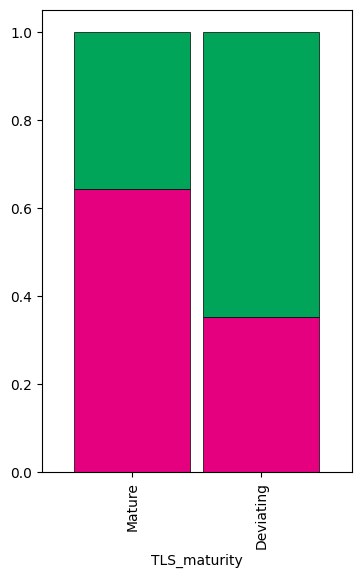

In [21]:
plt.figure()
df_rst.plot.bar(stacked=True, figsize=(4, 6), width=0.9, linewidth=0.5, legend=False, edgecolor='black', color={'Cluster_0': '#e4007f', 'Cluster_1': '#00a559'})
plt.show()